# Data Acquistition

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
noshow_appointments = pd.read_csv("KaggleV2-May-2016.csv")
(noshow_appointments.head())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
# Assign the dataset to a variable and take a sample of the set.
df = pd.DataFrame(noshow_appointments)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
# Displays some necessary features.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Data Cleaning

There are columns which have typos.So,we have to first clear them,so that their is no confusion later on.

In [4]:
# Rename the columns with typos.
noshow_appointments.rename(columns = {'Hipertension':'Hypertension',
                                      'Handcap':'Handicap','No-show':'Noshow'},inplace=True)
print (noshow_appointments.columns)
noshow_appointments.head

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Noshow'],
      dtype='object')


<bound method NDFrame.head of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04

In [5]:
df = pd.DataFrame(noshow_appointments)

We have to check for any error values and NaNs in data before prediction.For that,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  Noshow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the above info,it is clear that we have no NANs and missing values.

First, we are going to convert the data type of AppointmentDay and ScheduledDay to DateTime format

In [7]:
# Converting AppointmentDay and ScheduledDay from object type to datetime64[ns].
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df['WeekDay'] = df['AppointmentDay'].dt.day
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
df['DayScheduled'] = df['ScheduledDay'].dt.day

Next, we are going to drop PatientId and AppointmentID as they are of no use for the prediction and also the object type columns Noshow and Gender are changing into integers

In [8]:
# Dropping 'PatientId' and 'AppointmentID' as they are just some system generated numbers which are not at all important 
# in our analysis.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
# Converting 'Gender' and 'Noshow' from object format to integer format.
df.Gender = df.Gender.apply(lambda x: 1 if x == 'M' else 0)
df['Noshow'] = df['Noshow'].replace('Yes',1)
df['Noshow'] = df['Noshow'].replace('No',0)

C:\Users\narla\AppData\Local\Temp\ipykernel_22008\3543814192.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Noshow'] = df['Noshow'].replace('No',0)


In [9]:
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,WeekDay,DayScheduled
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,29,29
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,29,29
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,29,29
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,29,29
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,29,29


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  int64         
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hypertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handicap        110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  Noshow          110527 non-null  int64         
 12  WeekDay         110527 non-null  int32         
 13  DayScheduled    110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int6

In [11]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
Noshow            0
WeekDay           0
DayScheduled      0
dtype: int64

In [12]:
for column in df.columns:
    print("Unique Values in '{}': {}".format(column, df[column].unique()))


Unique Values in 'Gender': [0 1]
Unique Values in 'ScheduledDay': <DatetimeArray>
['2016-04-29 18:38:08', '2016-04-29 16:08:27', '2016-04-29 16:19:04',
 '2016-04-29 17:29:31', '2016-04-29 16:07:23', '2016-04-27 08:36:51',
 '2016-04-27 15:05:12', '2016-04-27 15:39:58', '2016-04-29 08:02:16',
 '2016-04-27 12:48:25',
 ...
 '2016-06-07 07:45:16', '2016-06-07 07:38:34', '2016-04-27 15:15:06',
 '2016-05-03 07:51:47', '2016-05-03 08:23:40', '2016-05-03 09:15:35',
 '2016-05-03 07:27:33', '2016-04-27 16:03:52', '2016-04-27 15:09:23',
 '2016-04-27 13:30:56']
Length: 103549, dtype: datetime64[ns]
Unique Values in 'AppointmentDay': <DatetimeArray>
['2016-04-29 00:00:00', '2016-05-03 00:00:00', '2016-05-10 00:00:00',
 '2016-05-17 00:00:00', '2016-05-24 00:00:00', '2016-05-31 00:00:00',
 '2016-05-02 00:00:00', '2016-05-30 00:00:00', '2016-05-16 00:00:00',
 '2016-05-04 00:00:00', '2016-05-19 00:00:00', '2016-05-12 00:00:00',
 '2016-05-06 00:00:00', '2016-05-20 00:00:00', '2016-05-05 00:00:00',
 '2016

In Age factor,we can see that there is a negative value and there are some strange values like ages above 100.So,what we are going to do is that we are considering only values between 0 and 95.Eventhough there are possibilities to live after 100 years, here I will treat the ages greater than 95 as outliers. Once I have made my assumptions, it is time to remove the impossible and the absurd from the data

In [13]:
# Considering ages between 0 and 95 including both and drop the rest by considering them as outliers.
df.drop(df[(df.Age < 0) & (df.Age > 95)].index, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  int64         
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hypertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handicap        110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  Noshow          110527 non-null  int64         
 12  WeekDay         110527 non-null  int32         
 13  DayScheduled    110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int6

# Data Exploration

Analyzing the probability of showing up with respect to different features

# 1.Age and Gender

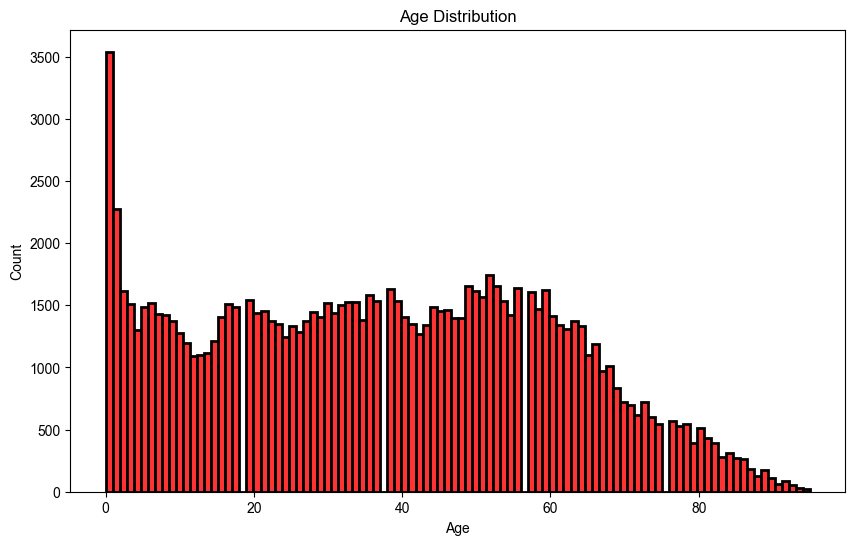

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Assuming df contains the DataFrame with a column 'Age'

sns.histplot(data=df, x='Age', bins=100, kde=False, stat='count', binrange=(0, 95), linewidth=2,alpha=0.8,color='r')
sns.set(style="whitegrid")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


From the histogram above,people who are in age group of 20 to 60 years are most likely into showing up

Text(0.5, 1.0, 'Gender based difference')

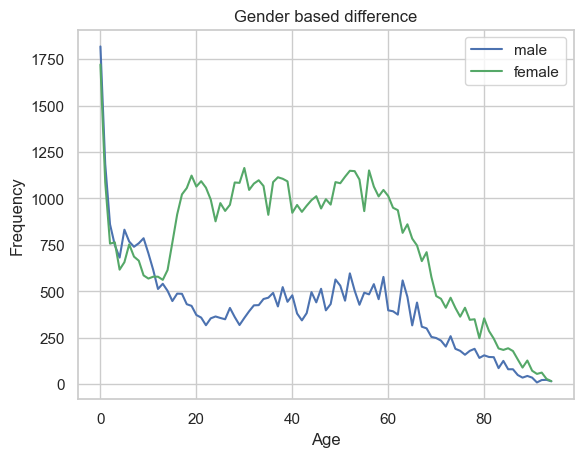

In [16]:

# Analysing the distribution among genders with their age.
range_df = pd.DataFrame()
range_df['Age'] = range(95)
men = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 1)]))
women = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 0)]))
plt.plot(range(95), men, color = 'b')
plt.plot(range(95), women, color = 'g')
plt.legend(['male','female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference')

Women are most likely to visit the doctor more than men.¶
From the above graph,it is clear that women are almost twice as likely to visit the doctor. But it is effective in a certain age group.

Starting from around the age of 20,women are more often visits the doctor till around the age 60 than men. The reason may be in both genders,women requires more visits due to their health issues than men like gynac related problems,other high risk problems like breast cancer and normal aged problem like weight gain/loss,thyroid,etc.We can't predict the reason exactly but can try to explain with the given medical conditions in the dataset.

# 2.Medical Conditions

Text(0, 0.5, 'Frequency')

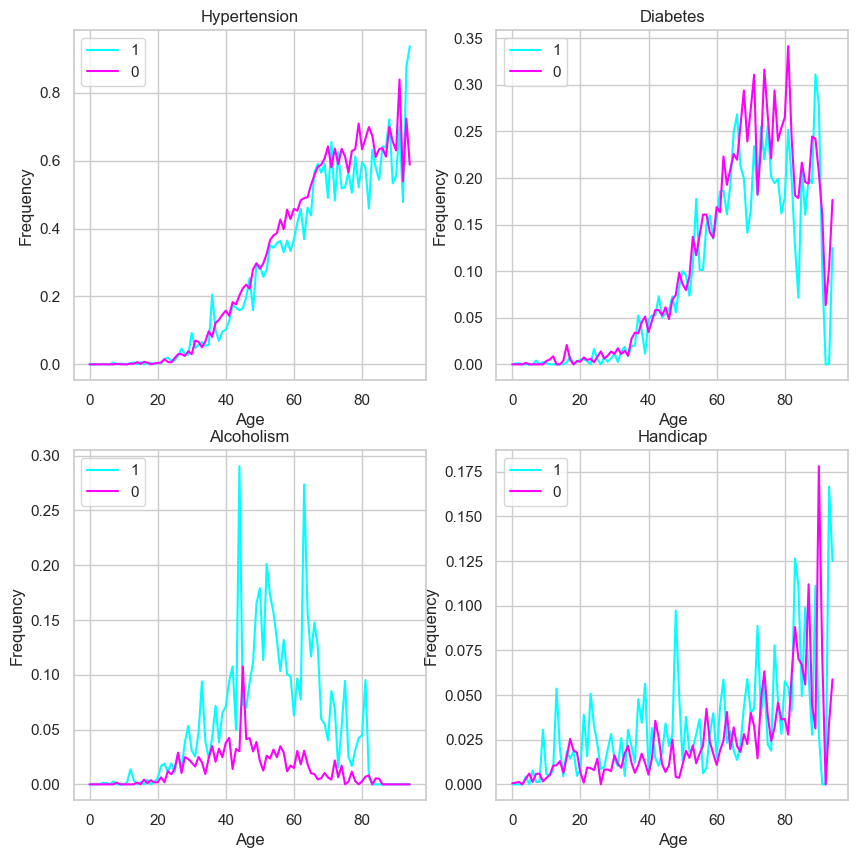

In [17]:
# Analysing and plotting the distribution among different medical conditions of both Genders with their age.
men_Hypertension = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1) & (df.Hypertension == 1)]))
women_Hypertension = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0) & (df.Hypertension == 1)]))

men_Diabetes = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1) & (df.Diabetes == 1)]))
women_Diabetes = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0) & (df.Diabetes == 1)]))

men_Alcoholism = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1) & (df.Alcoholism == 1)]))
women_Alcoholism = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0) & (df.Alcoholism == 1)]))

men_Handicap = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1) & (df.Handicap == 1)]))
women_Handicap = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0) & (df.Handicap == 1)]))
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(range(95),men_Hypertension/men,color='Cyan')
plt.plot(range(95),women_Hypertension/women, color = 'Magenta')
plt.title('Hypertension')
plt.legend([1,0], loc = 2)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.plot(range(95),men_Diabetes/men,color='Cyan')
plt.plot(range(95),women_Diabetes/women, color = 'Magenta')
plt.title('Diabetes')
plt.legend([1,0], loc = 2)
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(2,2,3)
plt.plot(range(95),men_Alcoholism/men,color='Cyan')
plt.plot(range(95),women_Alcoholism/women, color = 'Magenta')
plt.title('Alcoholism')
plt.legend([1,0], loc = 2)
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(2,2,4)
plt.plot(range(95),men_Handicap/men,color='Cyan')
plt.plot(range(95),women_Handicap/women, color = 'Magenta')
plt.title('Handicap')
plt.legend([1,0], loc = 2)
plt.xlabel('Age')
plt.ylabel('Frequency')


There are some specific conditions for doctors visit in both Genders.¶
From the graph,the two conditions Hypertension and Handicapness are seen in almost both Genders in which it is more after 60 years to Hypertension and after 80 years to Handicapness.In women who are between 60 and 80 years of age,Diabetes are common whereas Alcoholism is more common in men than women.

# AppointmentDay

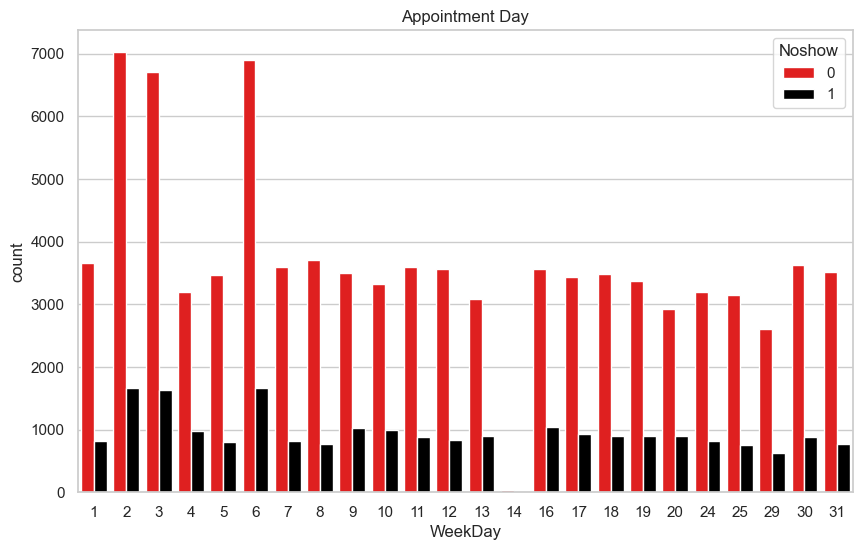

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

c = ['Red', 'Black']
sns.set(style="whitegrid")

# Assuming df contains the DataFrame and has columns 'WeekDay' and 'Noshow'

plt.figure(figsize=(10, 6))
app_day = sns.countplot(x='WeekDay', hue='Noshow', data=df, palette=c)
app_day.set_title('Appointment Day')
plt.show()



From the above graph distribution,we can say that most of the appointments are made on weekdays and not on the weekends. The most popular appointment days are in the middle of the week,that is,Tuesdays,Wednesdays and Thursdays; whereas Mondays and Fridays are the least popular days for appointments

# 4.SMS_received

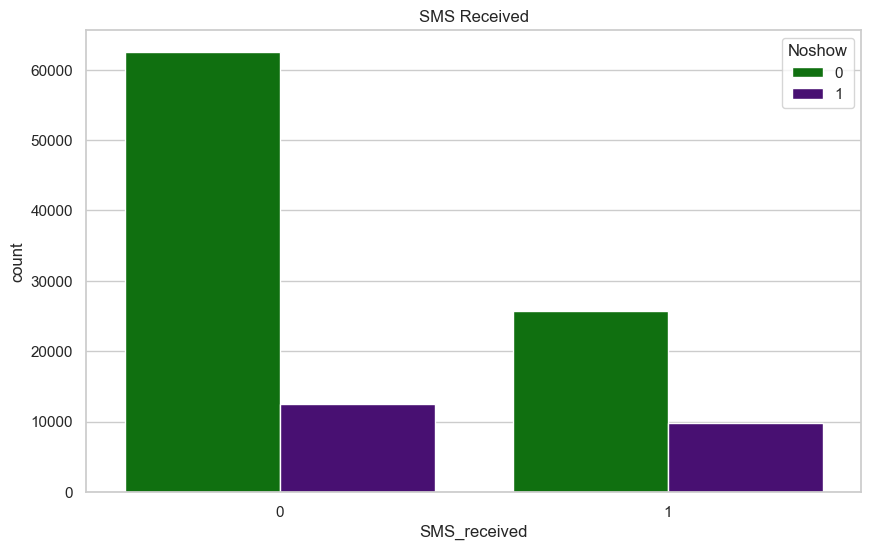

In [19]:
# Plotting SMS_received.
import seaborn as sns
import matplotlib.pyplot as plt

c = ['Green', 'Indigo']

plt.figure(figsize=(10, 6))

# Assuming df contains the DataFrame and has columns 'SMS_received' and 'Noshow'

sms = sns.countplot(x='SMS_received', hue='Noshow', data=df, palette=c)
sms.set_title('SMS Received')
plt.show()


patients who receive an SMS reminder are more likely to show up for their appointment.

# 5.Scholarship

Text(0.5, 1.0, 'Scholarship received')

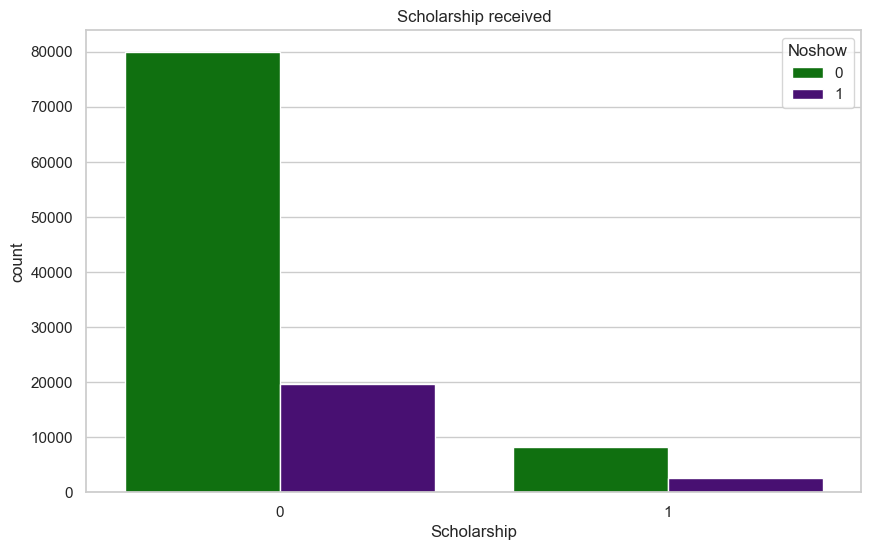

In [20]:
# Plotting Scholarship received with people who are showing up or not.

import seaborn as sns
import matplotlib.pyplot as plt

c = ['Green', 'Indigo']

plt.figure(figsize=(10, 6))
schrsp = sns.countplot(x = 'Scholarship',hue = 'Noshow',data = df,palette=c)
schrsp.set_title('Scholarship received')

There are only fewer people received scholarships,but it is evident that people who have scholarships are more likely to not show up to appointments than people who don't have scholarship

# 6.Neighbourhood

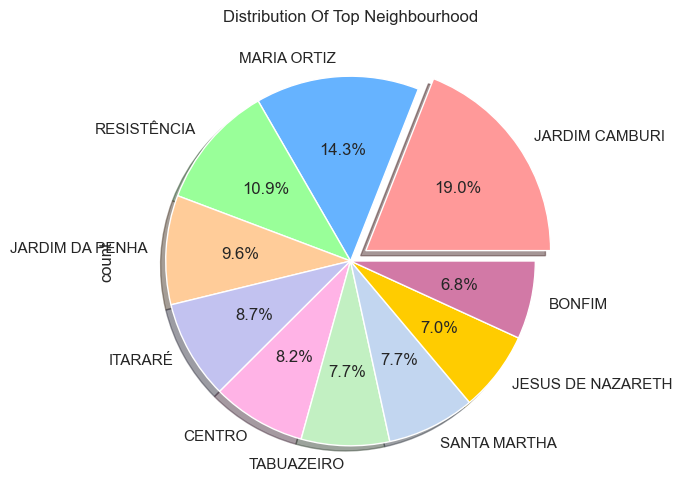

In [21]:
# Plotting the distribution of Neighbourhood with pie-chart.
import matplotlib.pyplot as plt

# Assuming df contains the DataFrame with a column 'Neighbourhood'

plt.subplots(figsize=(10, 6))  # Increase figure size
df['Neighbourhood'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0], colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#c2d6f0','#ffcc00','#d279a6'])
plt.title('Distribution Of Top Neighbourhood')
plt.show()


As most of the Neighbourhood have 80% show rate,this feature may not add much value while building a model to help us determine which segment of patients are turning up for a visit the most.So,we are dropping this factor in our analysis

# 7.ScheduledDay

Text(0.5, 1.0, 'ScheduledDay')

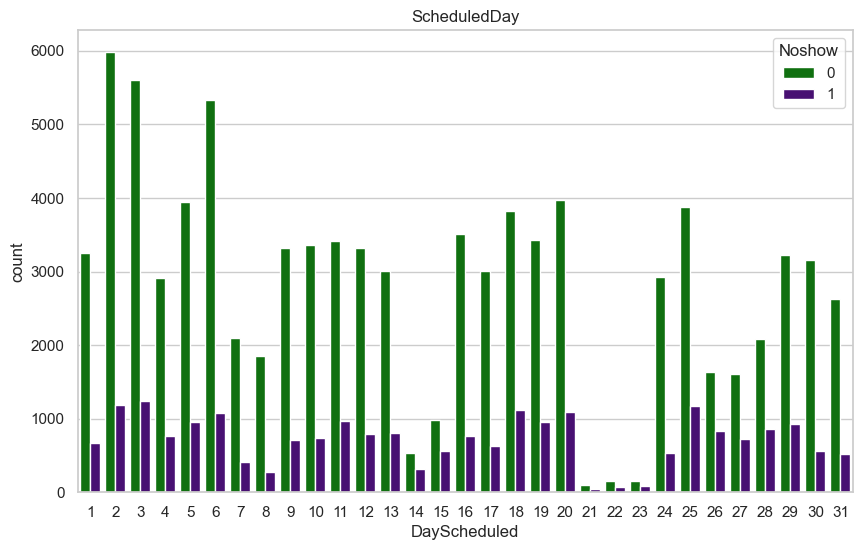

In [22]:
# plotting ScheduledDay
c = ['Green', 'Indigo']
plt.figure(figsize=(10, 6))
datescheduled = sns.countplot(x = 'DayScheduled', hue = 'Noshow', data = df,palette=c)
datescheduled.set_title('ScheduledDay')

From the graph distribution,most of the patients are showing up on their scheduled day

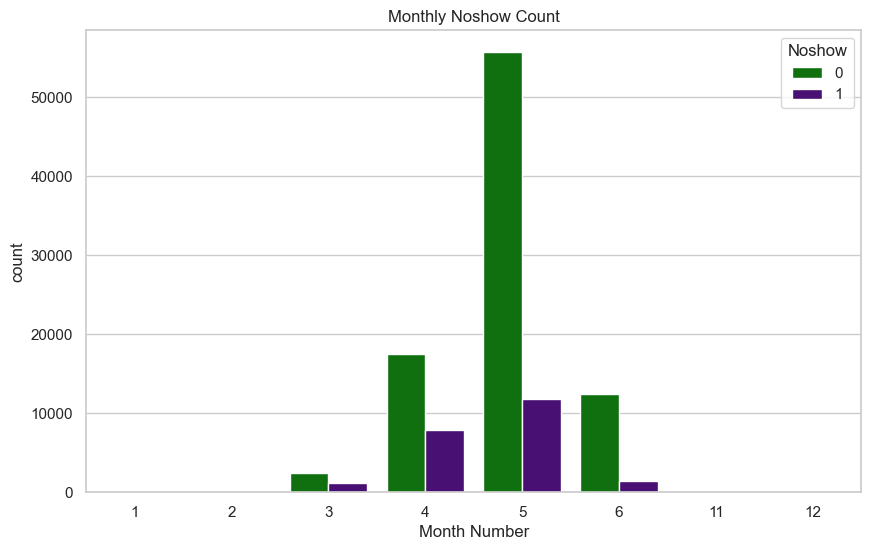

In [23]:

plt.figure(figsize=(10, 6))
df['Month Number'] = df['ScheduledDay'].dt.month
monthly_showup = sns.countplot(x = "Month Number", hue = "Noshow", data = df,palette=c)
monthly_showup.set_title("Monthly Noshow Count")
plt.show()

From the graph,it is clear that middle months are such that people are showing up for their appointments in a year

In [24]:

x = df.drop(['Noshow','Neighbourhood','ScheduledDay','AppointmentDay'], axis=1)
y = df['Noshow']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

C:\Users\narla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


79.54

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# KNN Algorithm
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 2)

# Decision Tree Algorithm
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
acc_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)

print("Logistic Regression Accuracy:", acc_log)
print("KNN Accuracy:", acc_knn)
print("Decision Tree Accuracy:", acc_dt)


# SVM Algorithm
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
acc_svm = round(accuracy_score(y_test, y_pred_svm) * 100, 2)

# Print SVM Accuracy
print("SVM Accuracy:", acc_svm)

Logistic Regression Accuracy: 79.54
KNN Accuracy: 77.28
Decision Tree Accuracy: 73.17
SVM Accuracy: 80.0


In [26]:
from sklearn.metrics import classification_report

# Logistic Regression Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# KNN Classification Report
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Decision Tree Classification Report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     35369
           1       0.36      0.01      0.02      8842

    accuracy                           0.80     44211
   macro avg       0.58      0.50      0.45     44211
weighted avg       0.71      0.80      0.71     44211


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     35369
           1       0.36      0.17      0.23      8842

    accuracy                           0.77     44211
   macro avg       0.59      0.55      0.55     44211
weighted avg       0.73      0.77      0.74     44211


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     35369
           1       0.31      0.28      0.30      8842

    accuracy                           0.73     44211
   macro avg       

C:\Users\narla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\narla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\narla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [27]:
from sklearn.metrics import precision_recall_fscore_support

# Logistic Regression Precision, Recall, F1-score
precision_lr, recall_lr, f1_lr, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Logistic Regression:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)

# KNN Precision, Recall, F1-score
precision_knn, recall_knn, f1_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
print("\nKNN:")
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

# Decision Tree Precision, Recall, F1-score
precision_dt, recall_dt, f1_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='weighted')
print("\nDecision Tree:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

# SVM Precision, Recall, F1-score
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')
print("\nSVM:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


Logistic Regression:
Precision: 0.7122254788716184
Recall: 0.7987152518603967
F1-score: 0.713502539344679

KNN:
Precision: 0.7251237794362522
Recall: 0.7727714822103097
F1-score: 0.7398265797758743

Decision Tree:
Precision: 0.7224183981370746
Recall: 0.7316504942208952
F1-score: 0.7268193331292385

SVM:
Precision: 0.6400072380381523
Recall: 0.8000045237610549
F1-score: 0.7111173661951433


C:\Users\narla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_lasso_binary = [1 if pred > 0.5 else 0 for pred in y_pred_lasso]

# Lasso Regression Precision, Recall, F1-score
precision_lasso, recall_lasso, f1_lasso, _ = precision_recall_fscore_support(y_test, y_pred_lasso_binary, average='weighted')
print("\nLasso Regression:")
print("Precision:", precision_lasso)
print("Recall:", recall_lasso)
print("F1-score:", f1_lasso)



Lasso Regression:
Precision: 0.6400072380381523
Recall: 0.8000045237610549
F1-score: 0.7111173661951433


C:\Users\narla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


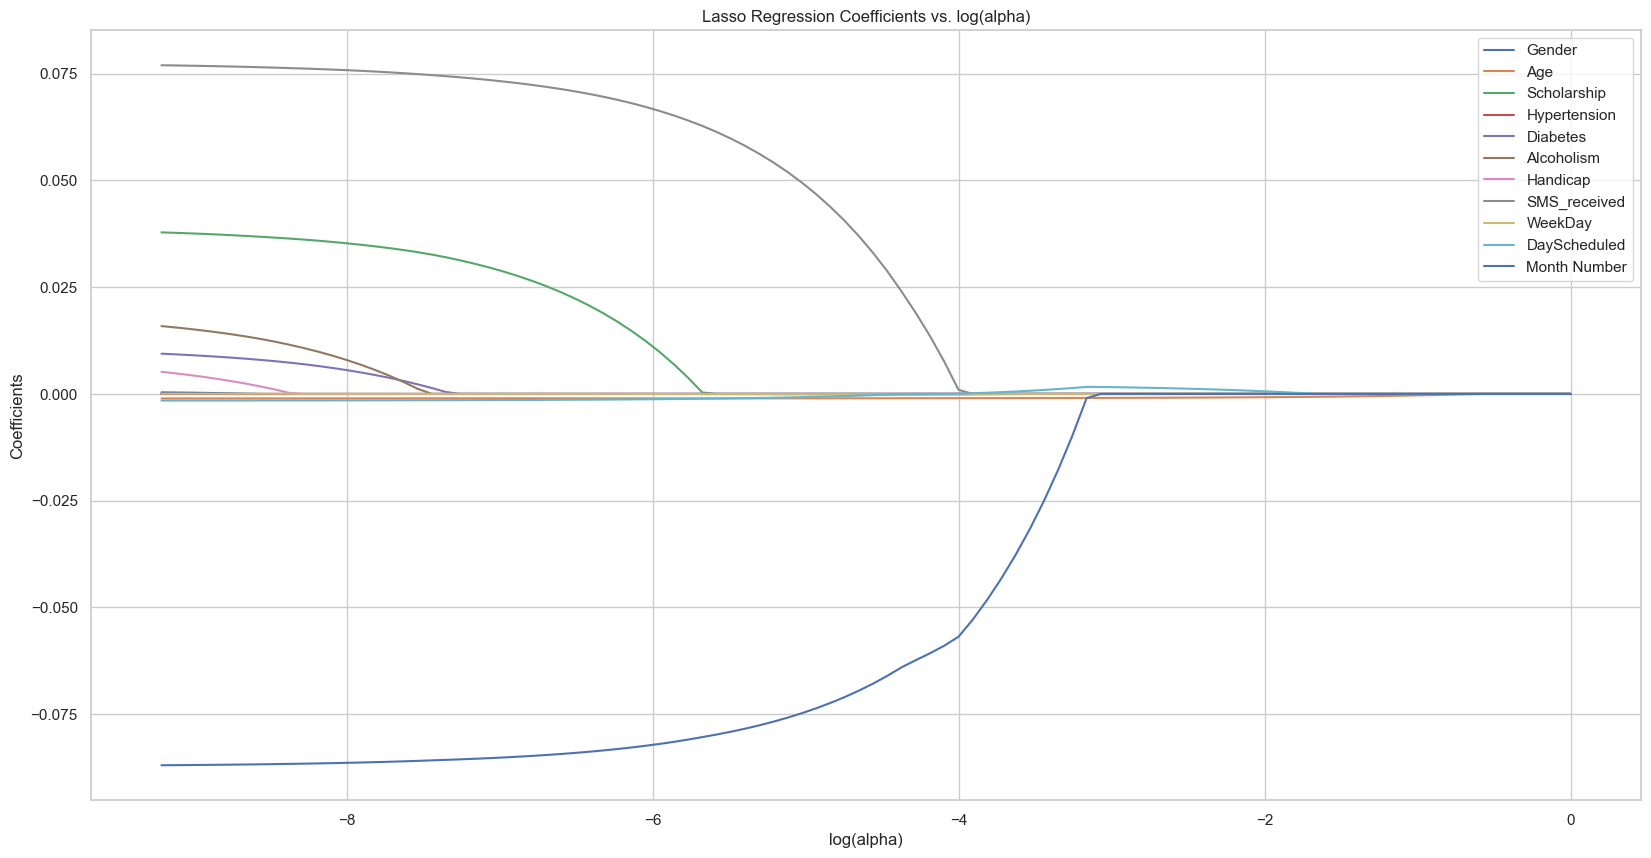

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# List of alpha values (lambda values)
alphas = np.logspace(-4, 0, 100)

# Initialize an empty list to store the coefficients for each alpha
coefs = []

# Fit the Lasso regression model for each alpha and store the coefficients
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)

# Plot the coefficients against the log(alpha) values
plt.figure(figsize=(20, 10))
plt.plot(np.log(alphas), coefs)
plt.xlabel('log(alpha)')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients vs. log(alpha)')
plt.legend(x.columns, loc='upper right')
plt.show()
